

# FRAUD DETECTION MODEL


# STEP - 1 LOAD THE DATASET

In [3]:
# import libraries required
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Fraud.csv")

# view the first few rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# SETP - 2 DATA UNDERSTANDING 

In [2]:
# Shape of dataset to know how big is the dataset
print("Shape:", df.shape)

# Data types to check if any column needs type conversion
print("\nData Types:\n", df.dtypes)

# Missing values 
print("\nMissing Values:\n", df.isnull().sum())

# Sample stats to indentify any negative balance 
print("\nBasic Statistics:\n", df.describe())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Shape: (6362620, 11)

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Basic Statistics:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.

# FINDINGS OF STEP 2 

# * MOSTLY ALL COLUMNS ARE NUMERICAL FEATURES WITH FEW CATEGORICAL COLUMNS 
# * NO MISSING VALUES - CLEAN DATASET
# * CHECKED FOR NEGATIVE OR EXTREME VALUES BUT THE BALAMCE AND AMOUNT ARE MOSLTY POSITIVE AND CONSISTENT
# * NO DUPLICATE ROWS 

# STEP - 3 EXPLORATORY DATA ANALYSIS

# A) TARGET VARIABLE DISTRIBUTION (ISFRAUD)

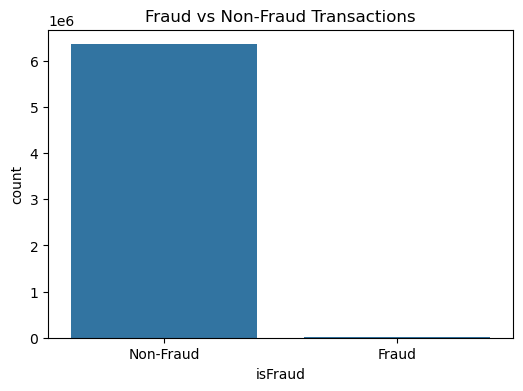

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target Variable Distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# B) FRAUD % PER TRANSACTION TYPE - TO IDENTIFY WHICH TYPE OF TRANSACTION HAS HIGHEST FRAUD RATE

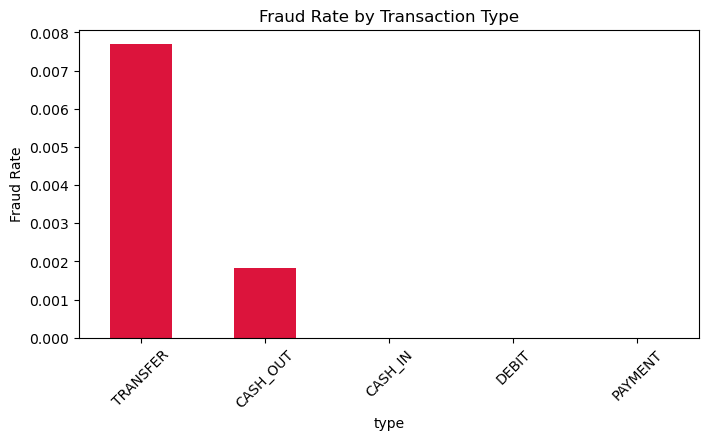

type
TRANSFER    0.77
CASH_OUT    0.18
CASH_IN     0.00
DEBIT       0.00
PAYMENT     0.00
Name: isFraud, dtype: float64


In [6]:
# Fraud Percentage by Transaction Type
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
fraud_rate_by_type.plot(kind='bar', color='crimson')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

# print percentages
print((df.groupby('type')['isFraud'].mean() * 100).round(2).sort_values(ascending=False))


# C) TRANSACTION AMOUNTS FOR FRAUD VS NON FRAUD 

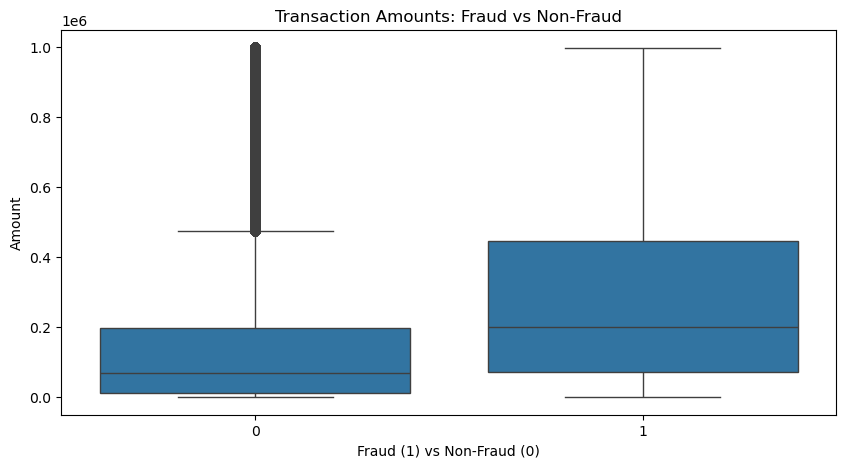

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < 1e6])
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Amount')
plt.show()


# D) CORRELATION HEATMAP TO CHECK FEATURE RELATIONSHIPS 

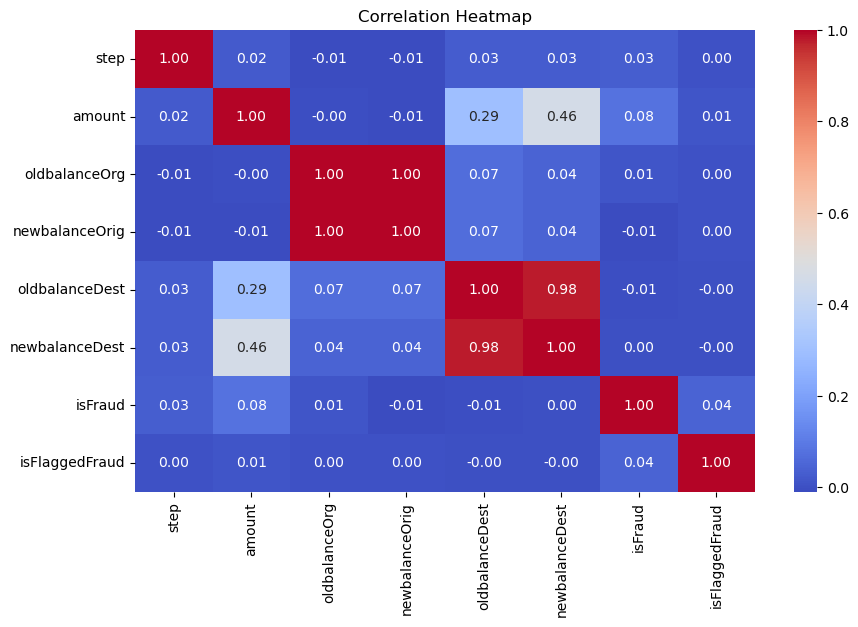

In [10]:
# Selecting  only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# THE KEY INSIGHTS FROM EDA ARE 

# THE DATASET IS HIGHLY SKEWED TOWARDS THE NON FRAUD(99.87) (FRAUD - 0.129) SO INSTEAD ON FOCUSING ON ACCURACY WE HAVE TO FOCUS ON PERFORMACNE METRICS LIKE PRECISION,RECALL AND F1-SCORE FOR MODEL EVALUATION

# STEP - 4 DATA PREPROCESSING - MAKING DATA MODEL TRAINING READY

In [14]:
# DROP IRRELEVANT COLUMNS 
df = df.drop(['nameOrig', 'nameDest'], axis=1)


In [15]:
# ENCODING THE CATEGROICAL COLUMNS
df = pd.get_dummies(df, columns=['type'], drop_first=True)


# STEP - 4 TRAIN AND TEST SPLIT 

In [16]:
# DEFINE THE FEATURES AND TARGET
X = df.drop("isFraud", axis=1)
y = df["isFraud"]


In [17]:
# TRAIN - TEST SPLIT 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# STEP - 6 MODEL TRAINING 

# 6.1) LOGISTIC REGRESSION - BECAUSE ITS SIMPLE LINEAR CLASSIFIER AND EASILY INTERPRETABLE 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270881
           1       0.03      0.92      0.06      1643

    accuracy                           0.96   1272524
   macro avg       0.51      0.94      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

Confusion Matrix:
[[1270691     190]
 [    219    1424]]


# I first tried Logistic Regression because it’s a basic model that’s easy to understand. The model was able to catch most of the frauds since recall was high, but it also marked a lot of normal transactions as fraud since precision was very low. Since fraud detection needs better balance, I decided to try with other tree-based models next like Decision Tree and Random Forest.”



# 6.2) DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.87      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



# Decision Tree gave much better results than Logistic Regression.

# High precision (88%) and recall (87%) for fraud detection.

# Overall accuracy close to 100%.

# 6.3) RANDOM FOREST 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



# After applying different models like Logistic Regression, Decision Tree, and Random Forest, I found that Random Forest gave the best performance. It had the highest precision (98%) and a good F1-score (87%) for detecting fraud. That means it has correctly flagged most fraud cases.


# SO THE BEST PREDICTOR IS RANDOM FOREST 

# NOW LEST SEE SOME VISUALIZATIONS FOR THE BEST PREDICTOR 

# Confusion Matrix Plot for best predictor 

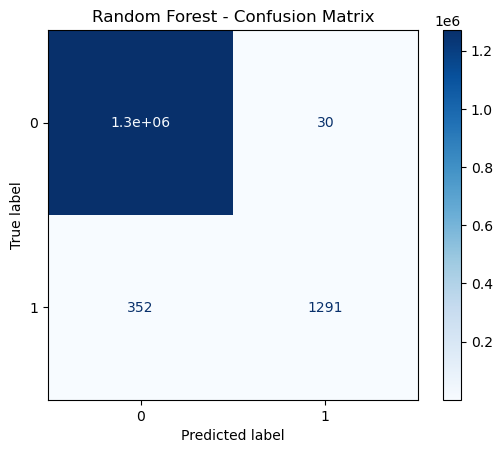

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()


# observation :
# Random Forest shows high accuracy with 1.3 million true negatives and 1291 true positives, indicating strong fraud detection performance.

# FEATURE IMPORTANCE PLOT - TO FIND WHICH FEATURE IS INFLUENCING THE FRAUD DETECTION

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10004\2223524501.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10), palette='viridis')


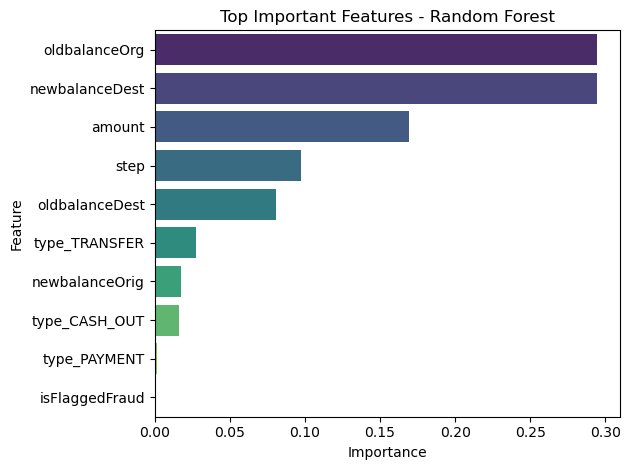

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the feature importance values
importances = rf.feature_importances_
features = X.columns

#  DataFrame Creation
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)


sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10), palette='viridis')
plt.title("Top Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# observation:

# Top features that influenced in predicting fraud were oldbalanceOrg, newbalanceDest, and amount 

# ROC CURVE

Text(0.5, 1.0, 'ROC Curve')

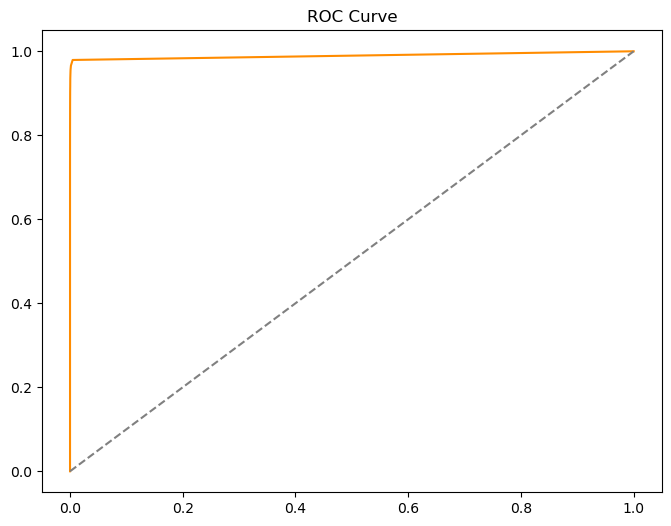

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# ROC curve and AUC computation
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")


# observation:

# The ROC curve shows that the model performs exceptionally well in distinguishing between fraud and non-fraud transactions.

# CONCLUSION




# In this project, I worked on detecting fraudulent transactions using a classification approach. After loading and understanding the data, I performed exploratory data analysis (EDA) and preprocessing to prepare it for modeling.

# then , I tried out different models including Logistic Regression, Decision Tree, and Random Forest. Among them, Random Forest gave the best results, achieving high accuracy and a strong balance between precision and recall, especially for identifying fraud cases.I also used evaluation metrics like the confusion matrix, classification report, and ROC curve to understand the model’s performance. Feature importance from Random Forest helped identify which factors influenced fraud detection the most , features like oldbalanceOrg, newbalanceDest, and amount are the most important in predicting fraudulent transactions. These features had the highest impact on the model's decision-making. 

# Overall, this model can help the company flag potentially fraudulent transactions and reduce financial risk. However, further improvements can be made by fine-tuning the model or exploring advanced techniques like XGBoost or anomaly detection.

# how it helps companies

# * The model can help flag suspicious transactions automatically.

# * These can then be manually reviewd by the team.

